In [81]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [82]:
df = pd.read_csv("carData.csv")

In [83]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [84]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [85]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [87]:
for col in df.columns:
    if df[col].dtypes == "object":
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace(" ","_")

df.head()                       

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [88]:
df = df.drop(["market_category"],axis=1)
df = df.dropna()


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11812 non-null  object 
 1   model              11812 non-null  object 
 2   year               11812 non-null  int64  
 3   engine_fuel_type   11812 non-null  object 
 4   engine_hp          11812 non-null  float64
 5   engine_cylinders   11812 non-null  float64
 6   transmission_type  11812 non-null  object 
 7   driven_wheels      11812 non-null  object 
 8   number_of_doors    11812 non-null  float64
 9   vehicle_size       11812 non-null  object 
 10  vehicle_style      11812 non-null  object 
 11  highway_mpg        11812 non-null  int64  
 12  city_mpg           11812 non-null  int64  
 13  popularity         11812 non-null  int64  
 14  msrp               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_2056\1426671555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

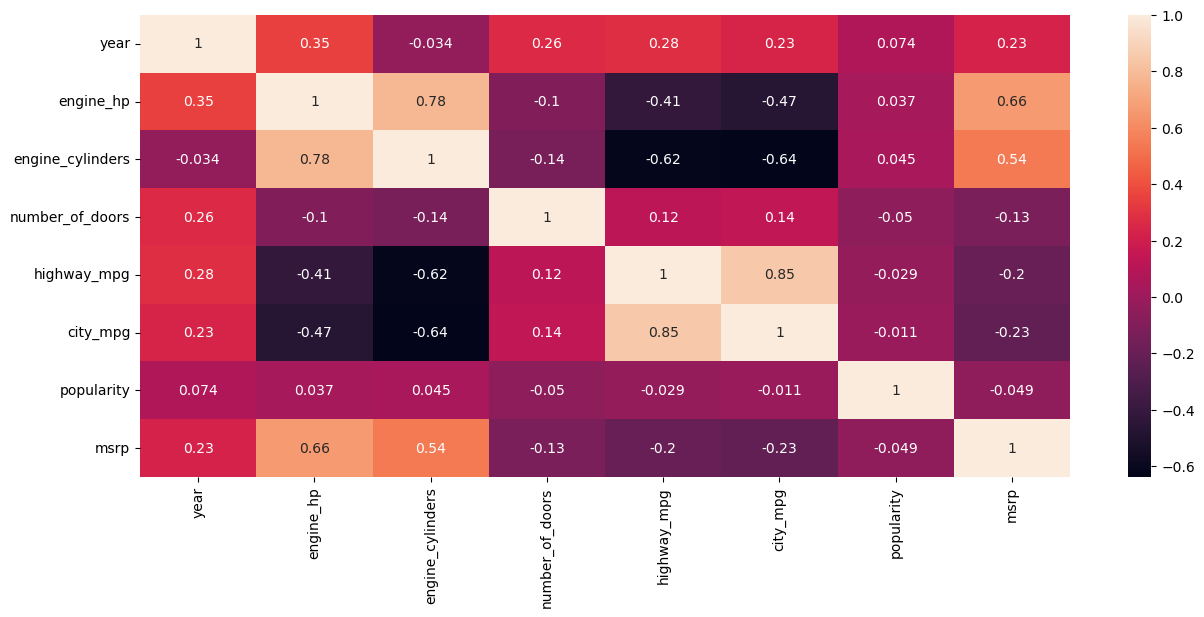

In [90]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [91]:
myModel = LinearRegression()

In [92]:
x = df[["engine_cylinders","engine_hp","year"]]
y = df[["msrp"]]
myModel.fit(x,y)
myModel.score(x,y)

0.4403940995646304

<Axes: xlabel='msrp', ylabel='Count'>

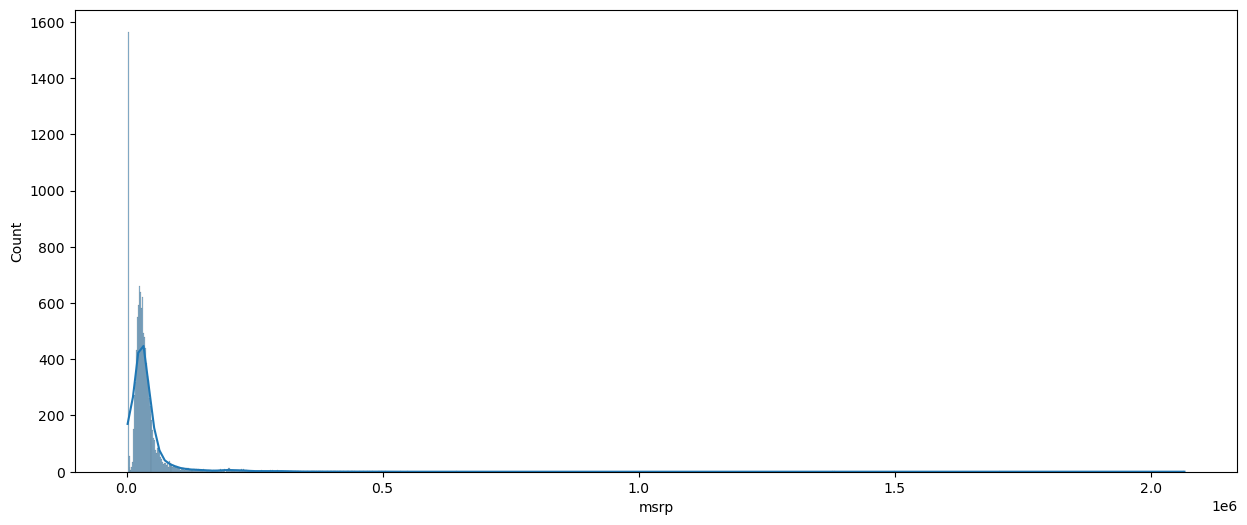

In [93]:
plt.figure(figsize=(15,6))
sns.histplot(df["msrp"],kde=True)

In [94]:
df = df[df["msrp"]<1e6]

<Axes: xlabel='msrp', ylabel='Count'>

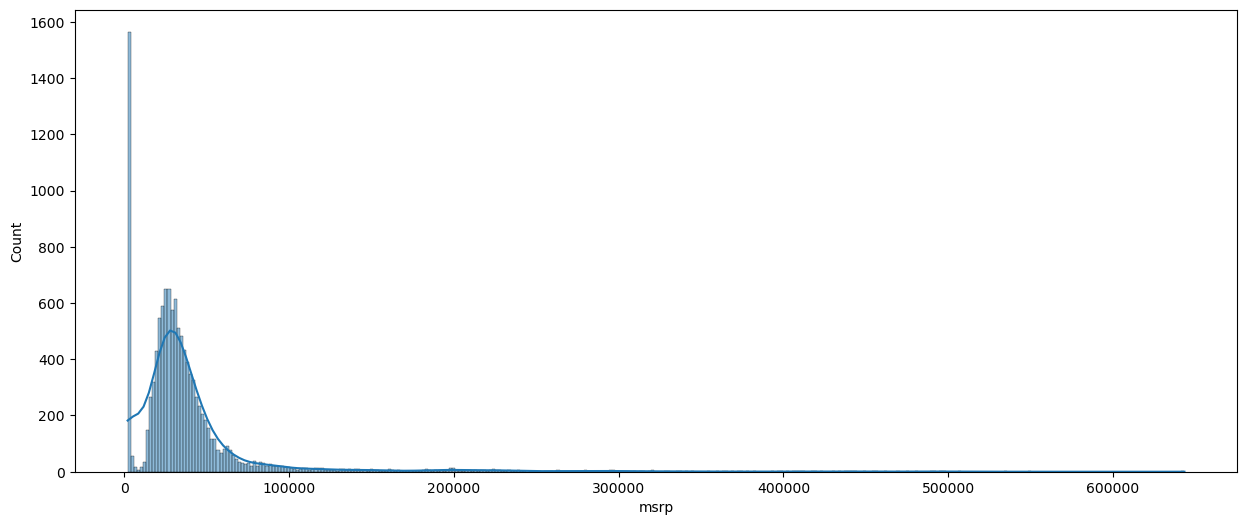

In [95]:
plt.figure(figsize=(15,6))
sns.histplot(df["msrp"],kde=True)

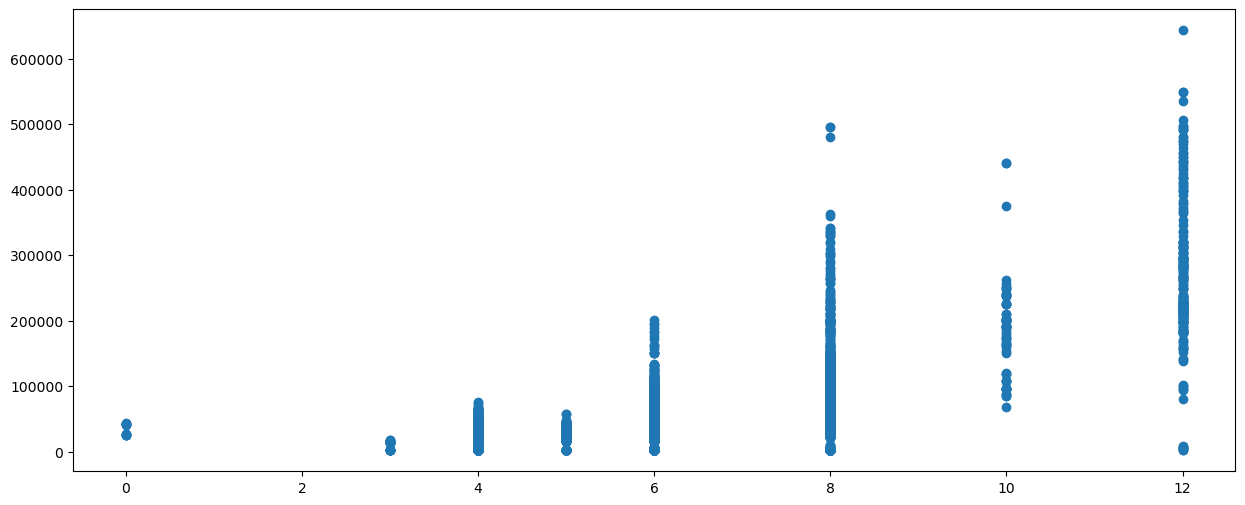

In [96]:
plt.figure(figsize=(15, 6))
plt.scatter(x=df["engine_cylinders"], y=df["msrp"])

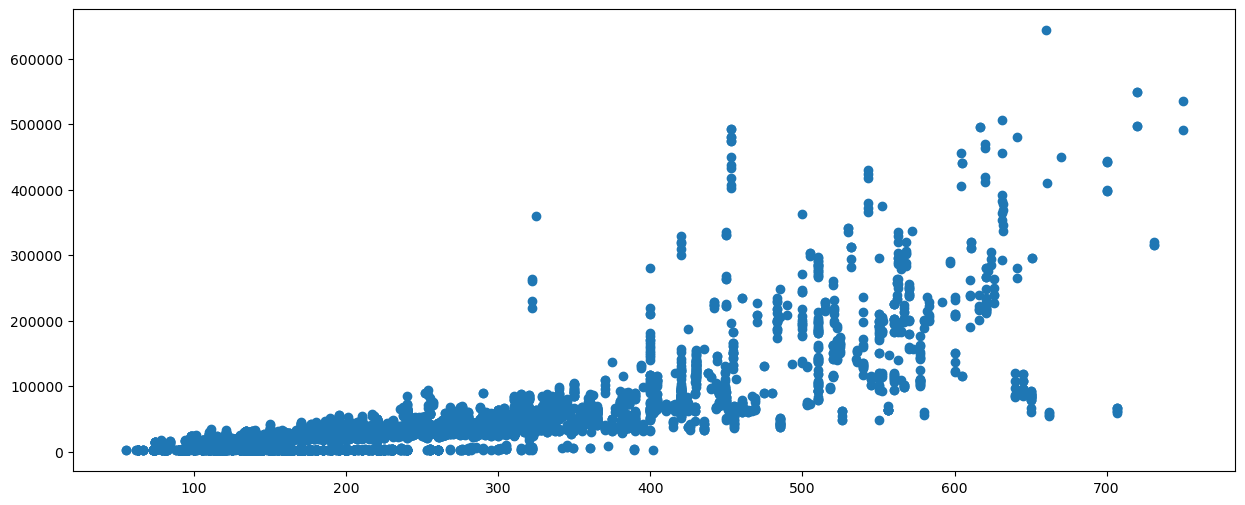

In [97]:
plt.figure(figsize=(15, 6))
plt.scatter(x=df["engine_hp"], y=df["msrp"])

In [98]:
df["engine_hp"] = np.where(df["engine_hp"]>700,700,df["engine_hp"])

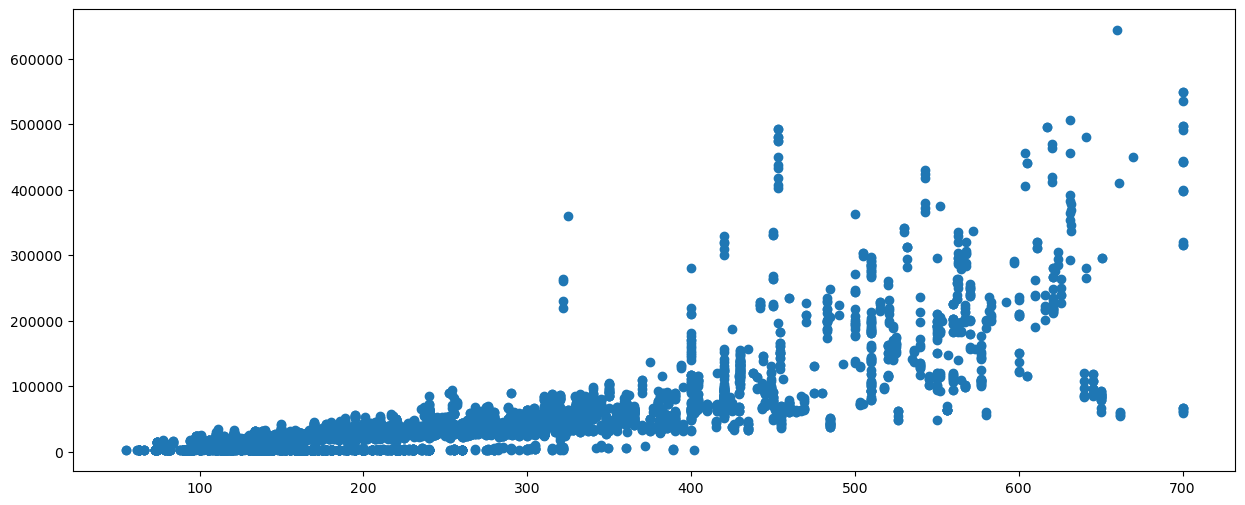

In [99]:
plt.figure(figsize=(15, 6))
plt.scatter(x=df["engine_hp"], y=df["msrp"])

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

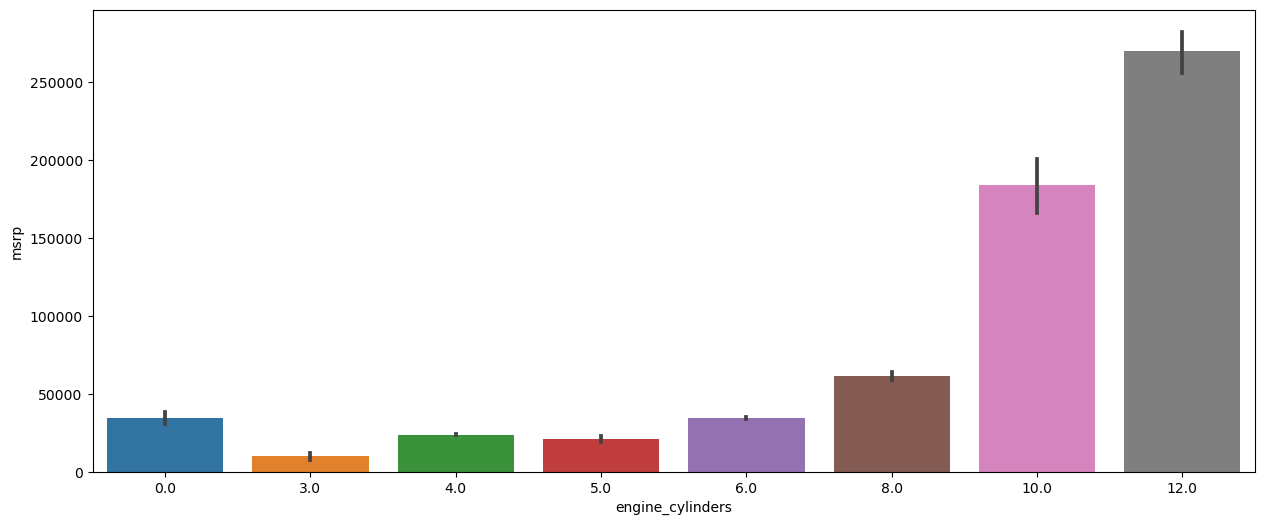

In [100]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["engine_cylinders"], y=df["msrp"])

In [101]:
df = df[df["engine_cylinders"]!=0]

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

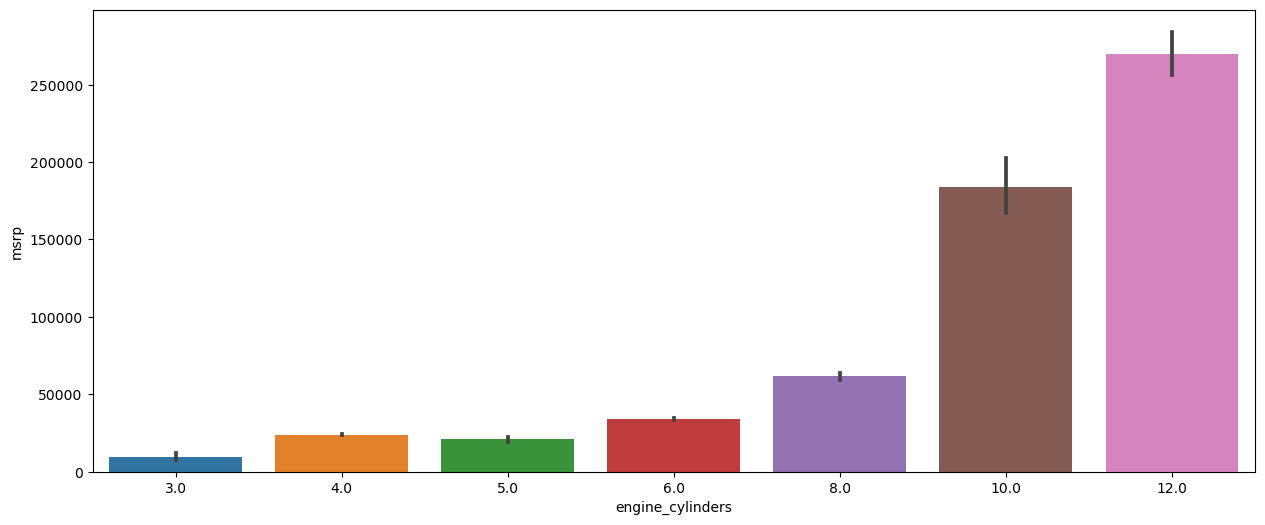

In [102]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["engine_cylinders"], y=df["msrp"])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11793 non-null  object 
 1   model              11793 non-null  object 
 2   year               11793 non-null  int64  
 3   engine_fuel_type   11793 non-null  object 
 4   engine_hp          11793 non-null  float64
 5   engine_cylinders   11793 non-null  float64
 6   transmission_type  11793 non-null  object 
 7   driven_wheels      11793 non-null  object 
 8   number_of_doors    11793 non-null  float64
 9   vehicle_size       11793 non-null  object 
 10  vehicle_style      11793 non-null  object 
 11  highway_mpg        11793 non-null  int64  
 12  city_mpg           11793 non-null  int64  
 13  popularity         11793 non-null  int64  
 14  msrp               11793 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


<Axes: xlabel='make', ylabel='msrp'>

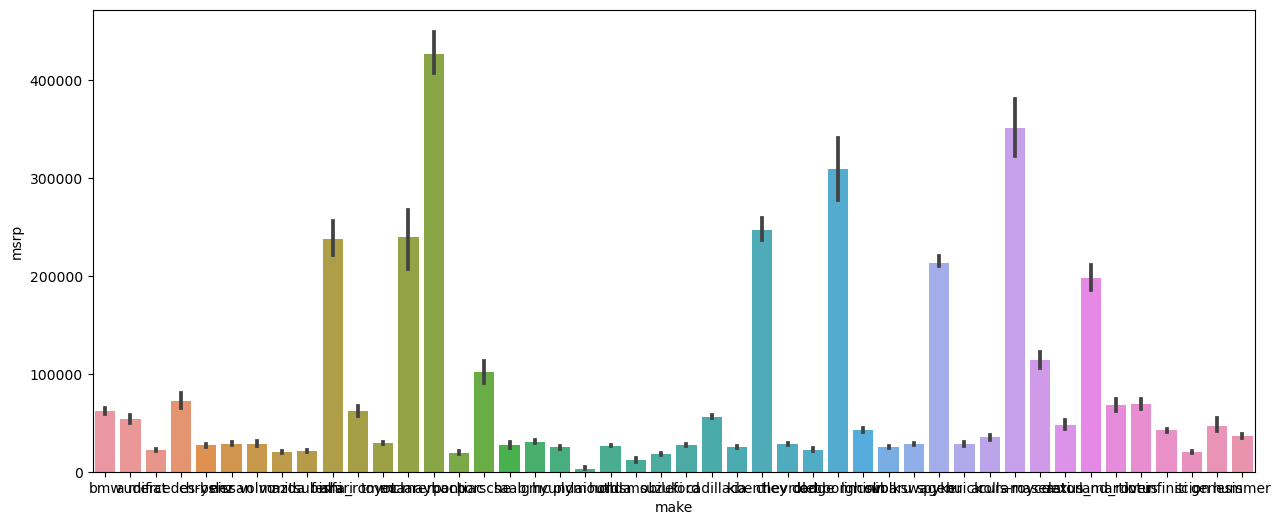

In [104]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df["make"], y=df["msrp"])

In [105]:
df = df.drop(["model"],axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11793 non-null  object 
 1   year               11793 non-null  int64  
 2   engine_fuel_type   11793 non-null  object 
 3   engine_hp          11793 non-null  float64
 4   engine_cylinders   11793 non-null  float64
 5   transmission_type  11793 non-null  object 
 6   driven_wheels      11793 non-null  object 
 7   number_of_doors    11793 non-null  float64
 8   vehicle_size       11793 non-null  object 
 9   vehicle_style      11793 non-null  object 
 10  highway_mpg        11793 non-null  int64  
 11  city_mpg           11793 non-null  int64  
 12  popularity         11793 non-null  int64  
 13  msrp               11793 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.3+ MB


In [107]:
df = pd.get_dummies(df,["make","engine_fuel_type","transmission_type","driven_wheels","vehicle_size","vehicle_style"])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 90 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           11793 non-null  int64  
 1   engine_hp                                                      11793 non-null  float64
 2   engine_cylinders                                               11793 non-null  float64
 3   number_of_doors                                                11793 non-null  float64
 4   highway_mpg                                                    11793 non-null  int64  
 5   city_mpg                                                       11793 non-null  int64  
 6   popularity                                                     11793 non-null  int64  
 7   msrp                                                      

In [110]:
x = df.drop(["msrp"], axis=1)
y = df["msrp"]
myModel.fit(x,y)
myModel.score(x,y)

0.8675738727348296